# World Countries Data Modeling- Midwestern United States Income Comparision in 2018

# 1st Step: Extracting  Data

In [3]:
#Unzipped zipfile from url, get the first csv file as a mapping table for country
# "WID_countries.csv" which contains the list and meaning of all country and region codes.
# This is the first table-- we won't use this table since our interest is USA's states
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

r = urllib2.urlopen(" https://wid.world/bulk_download/wid_all_data.zip").read()
with ZipFile(BytesIO(r)) as f:
    for name in f.namelist():
        if name.endswith('.csv'):
            with f.open(name) as zd:
                df = pd.read_csv(zd, encoding='latin1', sep=';')
                print(df)
                break
            

    alpha2                 titlename             shortname    region  \
0       AD                   Andorra               Andorra    Europe   
1       AE  the United Arab Emirates  United Arab Emirates      Asia   
2       AF               Afghanistan           Afghanistan      Asia   
3       AG       Antigua and Barbuda   Antigua and Barbuda  Americas   
4       AI                  Anguilla              Anguilla  Americas   
..     ...                       ...                   ...       ...   
384     YU                Yugoslavia            Yugoslavia    Europe   
385     ZA              South Africa          South Africa    Africa   
386     ZM                    Zambia                Zambia    Africa   
387     ZW                  Zimbabwe              Zimbabwe    Africa   
388     ZZ                  Zanzibar              Zanzibar    Africa   

            region2  
0    Western Europe  
1         West Asia  
2        South Asia  
3         Caribbean  
4         Caribbean  
.. 

In [4]:
df.head()

,alpha2,titlename,shortname,region,region2
0,AD,Andorra,Andorra,Europe,Western Europe
1,AE,the United Arab Emirates,United Arab Emirates,Asia,West Asia
2,AF,Afghanistan,Afghanistan,Asia,South Asia
3,AG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean
4,AI,Anguilla,Anguilla,Americas,Caribbean


In [5]:
# This is the second table
#file(s) named "WID_data_XX.csv" which contains the data for the country/region XX.

r = urllib2.urlopen(" https://wid.world/bulk_download/wid_all_data.zip").read()
countries_list = []
with ZipFile(BytesIO(r)) as f:
    for name in f.namelist():
        if name.startswith('WID_data_'):
            with f.open(name) as zd:
                country = pd.read_csv(zd, encoding='latin1', sep=';')
                countries_list.append(country)
all_countries = pd.concat(countries_list)
                


In [6]:
all_countries.head()

,country,variable,percentile,year,value,age,pop
0,AD,acfcnfi992,p0p100,2012,4239.1,992,i
1,AD,acfcnfi992,p0p100,2013,4144.1,992,i
2,AD,acfcnfi992,p0p100,2014,4109.7,992,i
3,AD,acfcnfi992,p0p100,2015,4119.5,992,i
4,AD,acfcnfi992,p0p100,2016,4109.4,992,i


In [7]:
# Check unique country for this data, our interest data could be : 
# 'US-CO','US-IA', 'US-IL','US-MI','US-MN', 'US-MO','US-NE','US-WI'
print(all_countries['country'].unique())

['AD' 'AE' 'AF' 'AG' 'AI' 'AL' 'AM' 'AN' 'AO' 'AR' 'AS' 'AT' 'AU' 'AW'
 'AZ' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BM' 'BN' 'BO' 'BR'
 'BS' 'BT' 'BW' 'BY' 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CK' 'CL' 'CM'
 'CN-RU' 'CN-UR' 'CN' 'CO' 'CR' 'CS' 'CU' 'CV' 'CW' 'CY' 'CZ' 'DD' 'DE-BD'
 'DE-BY' 'DE-HB' 'DE-HE' 'DE-HH' 'DE-PR' 'DE-SN' 'DE-WU' 'DE' 'DJ' 'DK'
 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'EH' 'ER' 'ES' 'ET' 'FI' 'FJ' 'FK' 'FM'
 'FO' 'FR' 'GA' 'GB' 'GD' 'GE' 'GH' 'GI' 'GL' 'GM' 'GN' 'GQ' 'GR' 'GT'
 'GU' 'GW' 'GY' 'HK' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL' 'IM' 'IN' 'IQ'
 'IR' 'IS' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KI' 'KM' 'KN' 'KP' 'KR'
 'KS' 'KW' 'KY' 'KZ' 'LA' 'LB' 'LC' 'LI' 'LK' 'LR' 'LS' 'LT' 'LU' 'LV'
 'LY' 'MA' 'MC' 'MD' 'ME' 'MG' 'MH' 'MK' 'ML' 'MM' 'MN' 'MO' 'MP' 'MR'
 'MS' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY' 'MZ' nan 'NC' 'NE' 'NG' 'NI' 'NL' 'NO'
 'NP' 'NR' 'NU' 'NZ' 'OA-MER' 'OA' 'OB-MER' 'OB' 'OC-MER' 'OC' 'OD-MER'
 'OD' 'OE-MER' 'OE' 'OH-MER' 'OH' 'OI-MER' 'OI' 'OJ-MER' 'OJ' 'OM' 

In [8]:
# Filterout data for modeling 
#indicators = ['acfcnfi992', 'ansrnfi992']
filtered_us = ['US-IA', 'US-IL','US-MI','US-MN', 'US-MO','US-NE','US-WI','US-OH','US-KS','US-IN','US-SD','US-ND']

In [9]:

filtered_data =all_countries[(all_countries["year"]>=2018) & all_countries["country"].isin(filtered_us)]




In [10]:
filtered_data.head()

,country,variable,percentile,year,value,age,pop
100,US-IA,afiinct992,p0p90,2018,51973.5,992,t
202,US-IA,afiinct992,p0p99,2018,66083.6,992,t
304,US-IA,afiinct992,p90p100,2018,290739.9,992,t
406,US-IA,afiinct992,p90p95,2018,159965.5,992,t
508,US-IA,afiinct992,p95p100,2018,422042.0,992,t


In [11]:
# check total number of record in filtered data, 528 records for each column is reasonable
filtered_data.count()

country       528
variable      528
percentile    528
year          528
value         528
age           528
pop           528
dtype: int64

In [16]:
# Check the unique for each column
print(filtered_data['country'].unique())
print(filtered_data['variable'].unique())
print(filtered_data['percentile'].unique())
print(filtered_data['age'].unique())
# t= tax unit, according to metadata's description
print(filtered_data['pop'].unique())
# We only have 2018 data
print(filtered_data['year'].unique())

['US-IA' 'US-IL' 'US-IN' 'US-KS' 'US-MI' 'US-MN' 'US-MO' 'US-ND' 'US-NE'
 'US-OH' 'US-SD' 'US-WI']
['afiinct992' 'sptinct992' 'mfiinct992' 'npopult992' 'ntaxret992'
 'sfiinct992']
['p0p90' 'p0p99' 'p90p100' 'p90p95' 'p95p100' 'p95p99' 'p99.5p100'
 'p99.5p99.9' 'p99.99p100' 'p99.9p100' 'p99.9p99.99' 'p99p100' 'p99p99.5'
 'p0p100']
[992]
['t']
[2018]


In [17]:
# this is the 3rd table---meta data-- this is indicator table
#file(s) named "WID_metadata_XX.csv" which contains the metadata for the country/region XX.
r = urllib2.urlopen(" https://wid.world/bulk_download/wid_all_data.zip").read()
metadata_list = []
with ZipFile(BytesIO(r)) as f:
    for name in f.namelist():
        if name.startswith('WID_metadata_'):
            with f.open(name) as zd:
                metadata = pd.read_csv(zd, encoding='latin1', sep=';')
                metadata_list.append(metadata)
all_metadata = pd.concat(metadata_list)

In [18]:
all_metadata.head()

,country,variable,age,pop,countryname,shortname,simpledes,technicaldes,shorttype,longtype,shortpop,longpop,shortage,longage,unit,source,method,extrapolation,data_points
0,AD,acfcnfi992,992,i,Andorra,Consumption of fixed capital of non-financial ...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,EUR,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
1,AD,acfcnfi999,999,i,Andorra,Consumption of fixed capital of non-financial ...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,EUR,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
2,AD,acomnxi992,992,i,Andorra,Net foreign labor income,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,EUR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...,NaN,NaN
3,AD,acomnxi999,999,i,Andorra,Net foreign labor income,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,EUR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...,NaN,NaN
4,AD,aconfci992,992,i,Andorra,Consumption of fixed capital,Consumption of fixed capital of national econo...,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,EUR,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN


# 2nd Step: Joining Data

In [19]:
# We will join our filtered data set to see how many indicators we can get
import pandas as pd
import numpy as np

df1 = pd.merge(all_metadata, filtered_data, how = 'inner', on='country')
print(df1.head())



  country  variable_x age_x pop_x countryname       shortname  \
0   US-IA  afiinct992   992     t        Iowa  Fiscal income    
1   US-IA  afiinct992   992     t        Iowa  Fiscal income    
2   US-IA  afiinct992   992     t        Iowa  Fiscal income    
3   US-IA  afiinct992   992     t        Iowa  Fiscal income    
4   US-IA  afiinct992   992     t        Iowa  Fiscal income    

                                           simpledes  \
0  Fiscal income is defined as the sum of all inc...   
1  Fiscal income is defined as the sum of all inc...   
2  Fiscal income is defined as the sum of all inc...   
3  Fiscal income is defined as the sum of all inc...   
4  Fiscal income is defined as the sum of all inc...   

                                        technicaldes shorttype  \
0  [Fiscal income ]=[Fiscal labour income [total ...   Average   
1  [Fiscal income ]=[Fiscal labour income [total ...   Average   
2  [Fiscal income ]=[Fiscal labour income [total ...   Average   
3  [Fisc

# 3rd Step: Cleaning Data

In [20]:
# Check total count for each column in our new dataframe
print(df1.count())

country          3168
variable_x       3168
age_x            3168
pop_x            3168
countryname      3168
shortname        3168
simpledes        3168
technicaldes     2112
shorttype        3168
longtype         3168
shortpop         3168
longpop          3168
shortage         3168
longage          3168
unit             3168
source           3168
method            528
extrapolation       0
data_points         0
variable_y       3168
percentile       3168
year             3168
value            3168
age_y            3168
pop_y            3168
dtype: int64


In [21]:
# We found there are two columns with 0 records, we will drop extrapolation, and data_points columns
# We also need to drop unncessary colums: source
df1 = df1.drop(['extrapolation','data_points','source'], axis=1)


In [22]:
# Check null value
print(df1.isna().sum().sum())
print(df1.isnull(). values. any())
print(df1.isna().sum())

3696
True
country            0
variable_x         0
age_x              0
pop_x              0
countryname        0
shortname          0
simpledes          0
technicaldes    1056
shorttype          0
longtype           0
shortpop           0
longpop            0
shortage           0
longage            0
unit               0
method          2640
variable_y         0
percentile         0
year               0
value              0
age_y              0
pop_y              0
dtype: int64


In [23]:
#  the two columns simpledes and technicaldes don't contain information that we want, we cand drop those two column
# instead of drop null value since it could affect number of records of our data
df1 = df1.drop(['technicaldes','simpledes'], axis=1)

In [24]:
# Check null value again
print(df1.isna().sum())

country           0
variable_x        0
age_x             0
pop_x             0
countryname       0
shortname         0
shorttype         0
longtype          0
shortpop          0
longpop           0
shortage          0
longage           0
unit              0
method         2640
variable_y        0
percentile        0
year              0
value             0
age_y             0
pop_y             0
dtype: int64


In [25]:
# method column is also not useful, we can drop this column as well
df1 = df1.drop(['method'], axis=1)


In [26]:
# Check null value again
print(df1.isna().sum())

country        0
variable_x     0
age_x          0
pop_x          0
countryname    0
shortname      0
shorttype      0
longtype       0
shortpop       0
longpop        0
shortage       0
longage        0
unit           0
variable_y     0
percentile     0
year           0
value          0
age_y          0
pop_y          0
dtype: int64


In [27]:
# Using display to display the entire of data frame
display(df1.head())

,country,variable_x,age_x,pop_x,countryname,shortname,shorttype,longtype,shortpop,longpop,shortage,longage,unit,variable_y,percentile,year,value,age_y,pop_y
0,US-IA,afiinct992,992,t,Iowa,Fiscal income,Average,Average income or wealth between two percentil...,tax unit,The base unit is the tax unit defined by natio...,Adults,The population is comprised of individuals ove...,USD,afiinct992,p0p90,2018,51973.5,992,t
1,US-IA,afiinct992,992,t,Iowa,Fiscal income,Average,Average income or wealth between two percentil...,tax unit,The base unit is the tax unit defined by natio...,Adults,The population is comprised of individuals ove...,USD,afiinct992,p0p99,2018,66083.6,992,t
2,US-IA,afiinct992,992,t,Iowa,Fiscal income,Average,Average income or wealth between two percentil...,tax unit,The base unit is the tax unit defined by natio...,Adults,The population is comprised of individuals ove...,USD,afiinct992,p90p100,2018,290739.9,992,t
3,US-IA,afiinct992,992,t,Iowa,Fiscal income,Average,Average income or wealth between two percentil...,tax unit,The base unit is the tax unit defined by natio...,Adults,The population is comprised of individuals ove...,USD,afiinct992,p90p95,2018,159965.5,992,t
4,US-IA,afiinct992,992,t,Iowa,Fiscal income,Average,Average income or wealth between two percentil...,tax unit,The base unit is the tax unit defined by natio...,Adults,The population is comprised of individuals ove...,USD,afiinct992,p95p100,2018,422042.0,992,t


# Step 4: Visualizations

In [28]:
# Check number of states in our dataframe
print(df1['countryname'].unique())

['Iowa' 'Illinois' 'Indiana' 'Kansas' 'Michigan' 'Minnesota' 'Missouri'
 'North Dakota' 'Nebraska' 'Ohio' 'South Dakota' 'Wisconsin']


In [29]:
# Plot income by each state
average_income = df1.groupby('countryname')['value'].mean()
print(average_income)

countryname
Illinois        1.270959e+10
Indiana         5.276602e+09
Iowa            2.679105e+09
Kansas          2.583949e+09
Michigan        7.780823e+09
Minnesota       5.565077e+09
Missouri        4.759303e+09
Nebraska        1.772526e+09
North Dakota    7.456804e+08
Ohio            9.441008e+09
South Dakota    8.047602e+08
Wisconsin       5.099230e+09
Name: value, dtype: float64


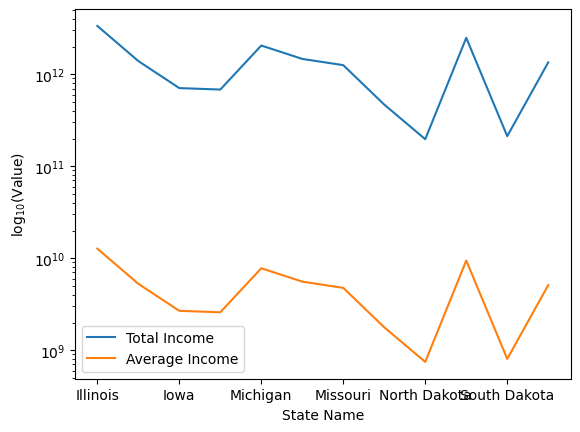

In [30]:
import matplotlib.pyplot as plt


total_income = df1.groupby('countryname')['value'].sum()
average_income = df1.groupby('countryname')['value'].mean()

total_income.plot(label="Total Income")
average_income.plot(label="Average Income")

plt.xlabel("State Name")
plt.ylabel("log$_{10}$(Value)")
plt.yscale("log")
plt.legend()
#plt.tight_layout()


# Filter data for African countries

In [31]:
df_test = df.merge( all_countries, how = 'inner', left_on = 'alpha2', right_on='country')
#filtering for years >=2020 because the kernel can't handle any more data

filtered_africa = ['Africa']

filtered_africa_data =df_test[(df_test["year"]>=2020) & df_test["region"].isin(filtered_africa)]
filtered_africa_data = filtered_africa_data.drop(['titlename','shortname','alpha2'], axis=1)
# check total number of record in filtered data
filtered_africa_data.count()

region        519040
region2       519040
country       509435
variable      519040
percentile    519040
year          519040
value         519040
age           519040
pop           519040
dtype: int64

In [32]:
#Filter for macroeconomic variables and for populations of all ages
filtered_metadata = all_metadata[(all_metadata['longtype'] == "Macroeconomic variable (i.e. corresponding to national economy rather than to a given group of individuals). The associated percentile is of the form 'pall'.")  & (all_metadata['shortage'] == 'All Ages')]

In [33]:
# Merge filtered metadata to African country data
df2 = pd.merge(filtered_metadata, filtered_africa_data, how = 'inner', on='country')

In [34]:
# Dropping columns with missing values or unneccessary information
df2 = df2.drop(['extrapolation','data_points','source','technicaldes','simpledes','country','method','unit'], axis=1)
# Check null value again
print(df2.isna().sum())

variable_x     0
age_x          0
pop_x          0
countryname    0
shortname      0
shorttype      0
longtype       0
shortpop       0
longpop        0
shortage       0
longage        0
region         0
region2        0
variable_y     0
percentile     0
year           0
value          0
age_y          0
pop_y          0
dtype: int64


In [35]:
print(df2['shortname'].unique())

['Compensation of employees ' 'Net foreign labor income'
 'Compensation of employees paid from the rest of the world'
 'Compensation of employees received from the rest of the world'
 'Consumption of fixed capital' 'Net foreign direct investment income'
 'Foreign direct investment income paid to the rest of the world'
 'Foreign direct investment income received  from the rest of the world'
 'Foreign income paid to the rest of the world'
 'Foreign income received from the rest of the world'
 'Net foreign labor and capital income'
 'Labor and capital income paid to the rest of the world'
 'Labor and capital income from the rest of the world'
 'Subsidies on production received from the rest of the world'
 'Taxes on production paid to the rest of the world'
 'Gross domestic product' 'Gross national income' 'Net public wealth'
 'Net personal wealth' 'Net domestic product' 'Net foreign income'
 'National income' 'Market-value national wealth '
 'Net foreign capital income'
 'Property income 

In [36]:
#filter to just GDP data

GDP = df2[df2['shortname'] =='Gross domestic product'].groupby(['countryname','year','longtype','longpop'])['value'].mean().reset_index().sort_values(by = 'value', ascending = False)
#print(GDP.head(40))

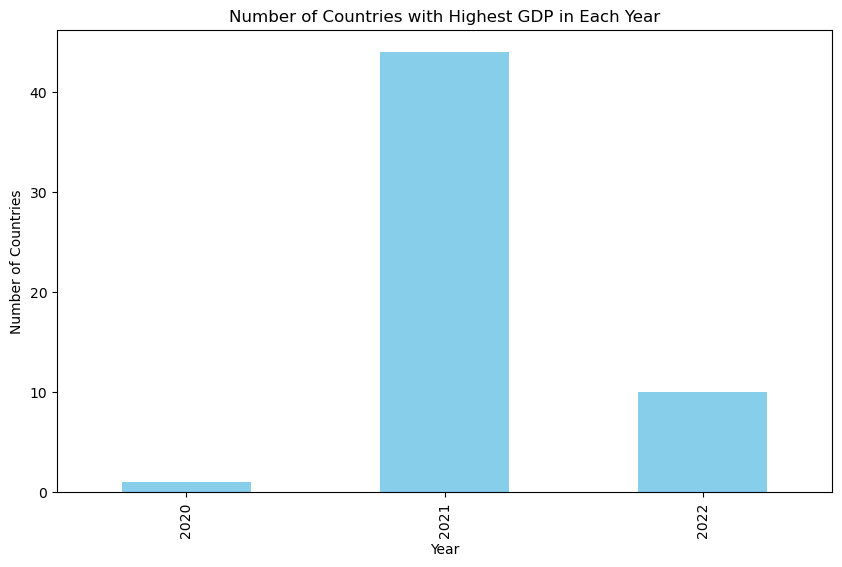

In [37]:
import matplotlib.pyplot as plt
max_GDP_year = GDP.loc[GDP.groupby('countryname')['value'].idxmax()]


country_counts = max_GDP_year['year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Countries with Highest GDP in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.show()

#The majority of countries had their highest GDP in 2021

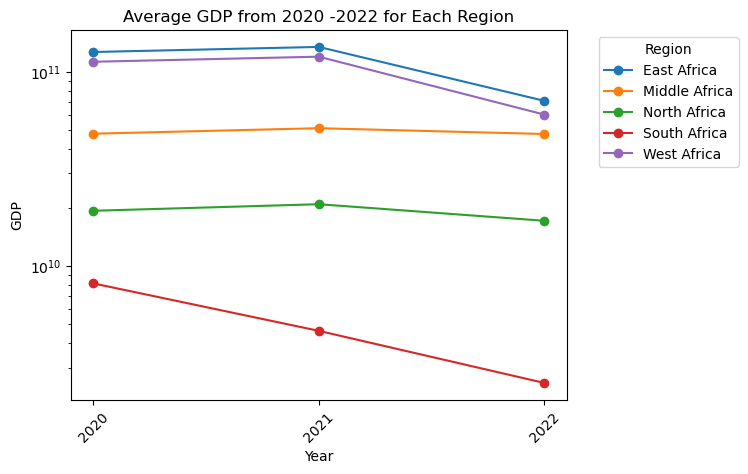

In [38]:

personal_wealth = df2[df2['shortname']=='Fiscal income '].groupby(['region2','year'])['value'].mean()
country_gdp = df2[df2['shortname']=='Gross domestic product'].groupby(['region2','year'])['value'].mean().reset_index()

df_sorted = country_gdp.sort_values(by=['year', 'region2'])

# Create a line plot for each country
for country, group in df_sorted.groupby('region2'):
    plt.plot(group['year'], group['value'], label=country, marker='o')

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('GDP')
plt.yscale("log")
plt.title('Average GDP from 2020 -2022 for Each Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
years = df_sorted['year'].unique()
plt.xticks(years, rotation=45)


# Show the plot
plt.show()


In [39]:
# Calculate average GDP for each country
average_country_gdp = df2.groupby(['countryname','region2'])['value'].mean()

# Sort countries based on average GDP
sorted_countries = average_country_gdp.sort_values().reset_index()

# Select the 5 smallest average GDPs
smallest_10_countries = sorted_countries.head(10)

# Print or use the result as needed
print(smallest_10_countries)

sorted_countries_desc = sorted_countries.sort_values(by = 'value',ascending = False)

largest_10_countries = sorted_countries_desc.head(10)
print(largest_10_countries)

             countryname        region2         value
0                Liberia    West Africa  9.161424e+06
1  Sao Tome and Principe  Middle Africa  3.686051e+07
2                Eritrea    East Africa  7.054937e+07
3             Seychelles    East Africa  7.831441e+07
4                Lesotho   South Africa  7.946226e+07
5              Swaziland   South Africa  1.305553e+08
6                 Gambia    West Africa  2.408375e+08
7                Tunisia   North Africa  2.544447e+08
8             Cabo Verde    West Africa  3.637401e+08
9               Botswana   South Africa  3.851142e+08
     countryname        region2         value
54       Nigeria    West Africa  7.912944e+11
53       Somalia    East Africa  6.917044e+11
52      Tanzania    East Africa  5.132079e+11
51        Uganda    East Africa  4.669095e+11
50        Guinea    West Africa  4.398997e+11
49  the DR Congo  Middle Africa  2.061362e+11
48  Sierra Leone    West Africa  1.973456e+11
47    Madagascar    East Africa  1.802

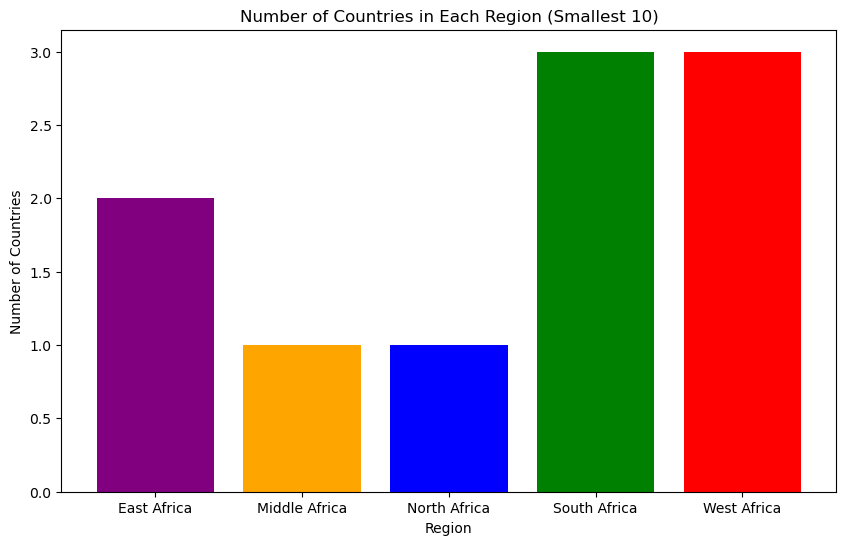

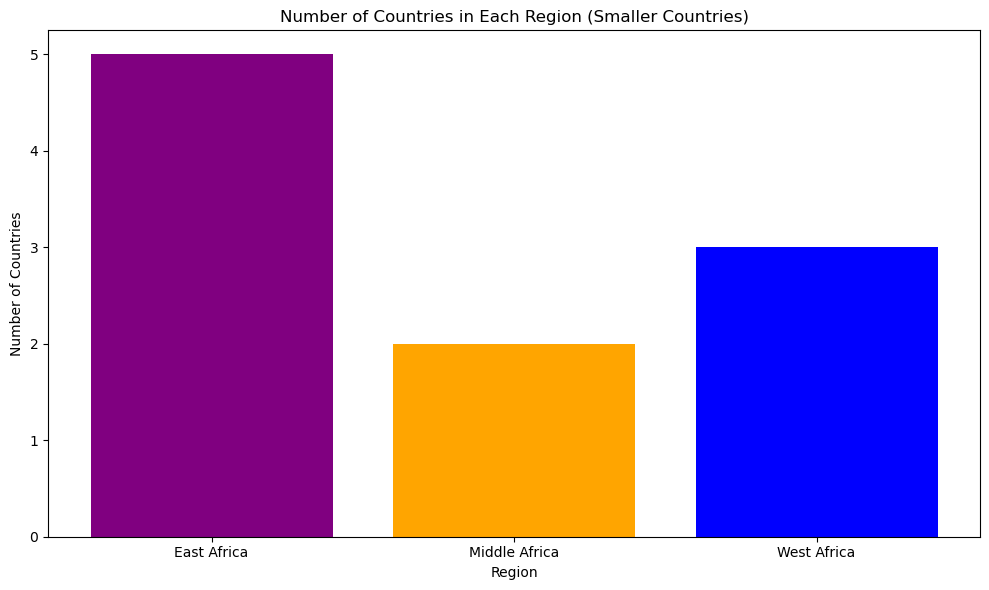

In [40]:

count_smallest = smallest_10_countries.groupby('region2')['countryname'].count().reset_index()
count_largest = largest_10_countries.groupby('region2')['countryname'].count().reset_index()

plt.figure(figsize=(10, 6))

colors = {'North Africa': 'blue', 'South Africa': 'green', 'West Africa': 'red', 'East Africa': 'purple', 'Middle Africa': 'orange'}

# Create a bar plot using Matplotlib
plt.bar(count_smallest['region2'], count_smallest['countryname'], color=[colors.get(region, 'gray') for region in count_smallest['region2']])


# Set labels and title
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Region (Smallest 10)')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

colors = {'North Africa': 'blue', 'South Africa': 'green', 'West Africa': 'red', 'East Africa': 'purple', 'Middle Africa': 'orange'}

# Create a bar plot using Matplotlib
plt.bar(count_largest['region2'], count_largest['countryname'], color=[colors.get(region, 'gray') for region in count_smallest['region2']])


# Set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Number of Countries')
ax.set_title('Number of Countries in Each Region (Smaller Countries)')

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
south_africa = df2[(df2['region2']=='South Africa') & (df2['shortname']=='Gross domestic product')].groupby(['countryname'])['value'].mean().reset_index().sort_values(by = 'value')


east_africa = df2[(df2['region2']=='East Africa') & (df2['shortname']=='Gross domestic product')].groupby(['countryname'])['value'].mean().reset_index().sort_values(by = 'value')


north_africa= df2[(df2['region2']=='North Africa') & (df2['shortname']=='Gross domestic product')].groupby(['countryname'])['value'].mean().reset_index().sort_values(by = 'value')


west_africa= df2[(df2['region2']=='West Africa') & (df2['shortname']=='Gross domestic product')].groupby(['countryname'])['value'].mean().reset_index().sort_values(by = 'value')


middle_africa= df2[(df2['region2']=='Middle Africa') & (df2['shortname']=='Gross domestic product')].groupby(['countryname'])['value'].mean().reset_index().sort_values(by = 'value')



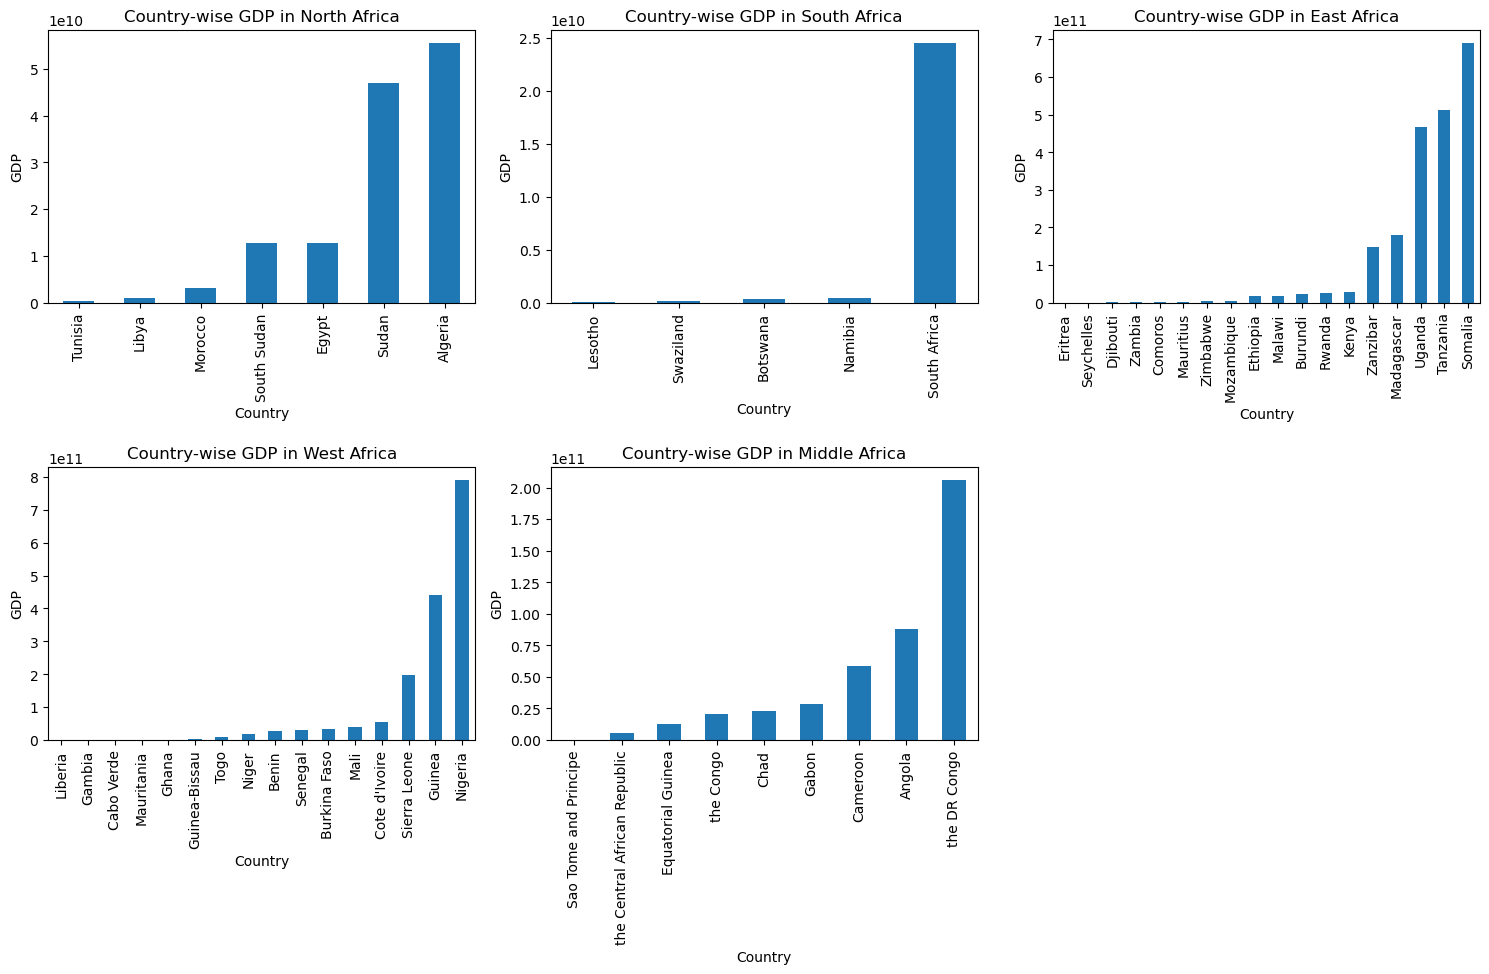

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array to make indexing easier
axs = axs.flatten()

# List of DataFrames for each region
africa_dfs = [north_africa, south_africa, east_africa, west_africa, middle_africa]

# List of titles for each subplot
titles = ['North Africa', 'South Africa', 'East Africa', 'West Africa', 'Middle Africa']

# Iterate over DataFrames and titles
for i, (df, title) in enumerate(zip(africa_dfs, titles)):
    # Plot the bar chart for the current region
    df.plot(kind='bar', x='countryname', y='value', ax=axs[i], legend=False)
    axs[i].set_title(f'Country-wise GDP in {title}')
    axs[i].set_xlabel('Country')
    axs[i].set_ylabel('GDP')

if len(africa_dfs) < len(axs):
    for i in range(len(africa_dfs), len(axs)):
        fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

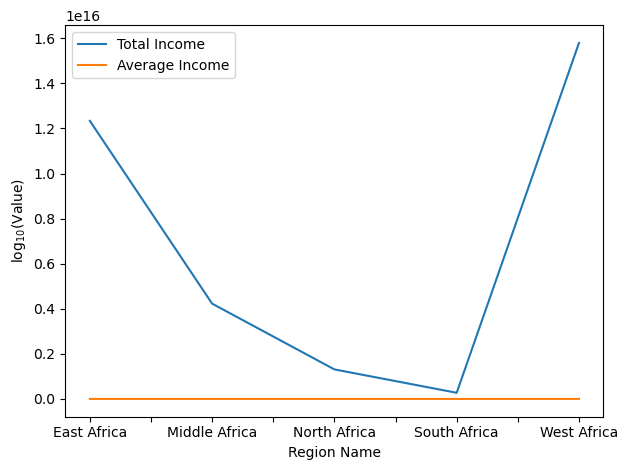

In [43]:
import matplotlib.pyplot as plt

total_income = df2[df2['shortname']=='Net portfolio income'].groupby('region2')['value'].sum()
average_income = df2[df2['shortname']=='Net portfolio income'].groupby('region2')['value'].mean()

total_income.plot(label="Total Income")
average_income.plot(label="Average Income")

plt.xlabel("Region Name")
plt.ylabel("log$_{10}$(Value)")
#plt.yscale("log")
plt.legend()
plt.tight_layout()


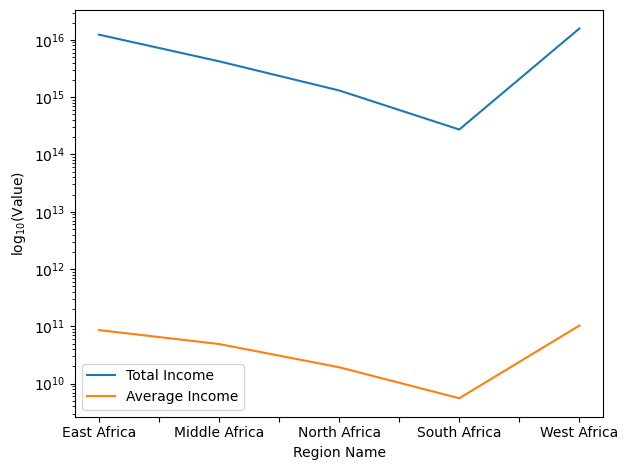

In [44]:
total_income = df2[df2['shortname']=='Net portfolio income'].groupby('region2')['value'].sum()
average_income = df2[df2['shortname']=='Net portfolio income'].groupby('region2')['value'].mean()

total_income.plot(label="Total Income")
average_income.plot(label="Average Income")

plt.xlabel("Region Name")
plt.ylabel("log$_{10}$(Value)")
plt.yscale("log")
plt.legend()
plt.tight_layout()

In [45]:
average_region_gdp = df2[df2['shortname']=='Gross domestic product'].groupby('region2')['value'].mean().reset_index()
print(average_region_gdp)

average_region_income = df2[df2['shortname']=='Net portfolio income'].groupby('region2')['value'].mean().reset_index()
print(average_region_income)

         region2         value
0    East Africa  1.167177e+11
1  Middle Africa  4.920263e+10
2   North Africa  1.934667e+10
3   South Africa  5.565079e+09
4    West Africa  1.033078e+11
         region2         value
0    East Africa  8.602800e+10
1  Middle Africa  4.920263e+10
2   North Africa  1.934667e+10
3   South Africa  5.565079e+09
4    West Africa  1.033078e+11


In [46]:
%pip install plotly
import plotly.express as px


# Create a pie chart
fig = px.pie(average_region_gdp, names='region2', values='value', title='Average Region GDP as Share of Continent GDP')

# Show the plot
fig.show()

# Create a pie chart
fig = px.pie(average_region_income, names='region2', values='value', title='Average Region GDP as Share of Continent GDP')

# Show the plot
fig.show()

Note: you may need to restart the kernel to use updated packages.


In [47]:
%pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
#Changing the names of countries in our dataframe to match the world admin boundaries country names

country_name_mapping = {
    'the DR Congo': 'Democratic Republic of the Congo',
    'the Congo': 'Congo',
    'the Central African Republic': 'Central African Republic',
    'the Congo': 'Congo',
    'Libya': 'Libyan Arab Jamahiriya',
    'Tanzania': 'United Republic of Tanzania',
    "Cote d'Ivoire": "Côte d'Ivoire"
    
}

df2['countryname'] = df2['countryname'].replace(country_name_mapping)


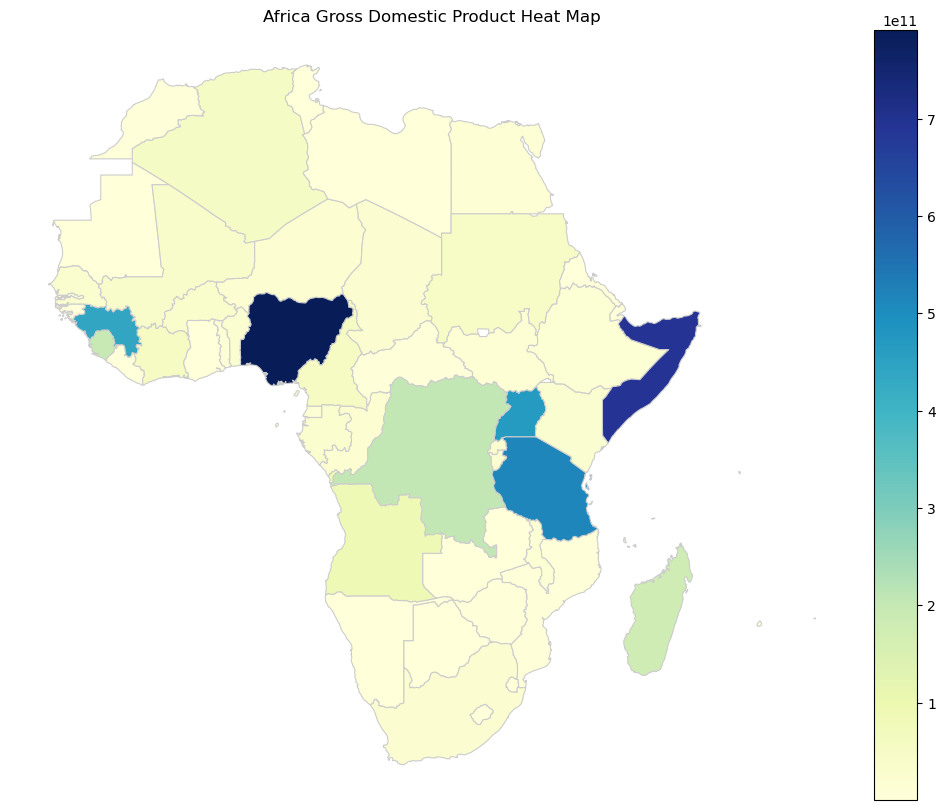

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load world shapefile
world = gpd.read_file('/Users/macyscheideman/Desktop/world-administrative-boundaries')

average_country_gdp = df2[df2['shortname']=='Gross domestic product'].groupby('countryname')['value'].mean().reset_index()
# Merge income data with shapefile
merged_data = world.merge(average_country_gdp, how='left', left_on='name', right_on='countryname')

# Plot the heat map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the choropleth map
merged_data.plot(column='value', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Set axis labels and title
ax.set_title('Africa Gross Domestic Product Heat Map')
ax.set_axis_off()

plt.show()